# Linear Regression with NumPy and Scikit-Learn & MLP with Keras

## Convenient data loading with keras

In [1]:
import numpy as np

In [2]:
import tensorflow as tf

/Users/steve/.local/share/virtualenvs/teaching-kL1iKbCK/lib/python3.8/site-packages/jax/_src/lib/__init__.py:33: UserWarning: JAX on Mac ARM machines is experimental and minimally tested. Please see https://github.com/google/jax/issues/5501 in the event of problems.
  warnings.warn("JAX on Mac ARM machines is experimental and minimally tested. "


We are using the Boston Housing dataset.

Samples contain 13 attributes of houses at different locations around the Boston suburbs in the late 1970s. Targets are the median values of the houses at a location (in k$).

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.boston_housing.load_data(seed=17)
y_train = y_train.reshape((-1, 1))
y_test = y_test.reshape((-1, 1))

In [4]:
x_train.shape, y_train.shape

((404, 13), (404, 1))

In [5]:
x_test.shape, y_test.shape

((102, 13), (102, 1))

## Linear regression with numpy

We have $(x_i^{train}, y_i^{train})_{i=1,\ldots,N}$ with $N=404$ given as the training data where $x_i^{train} \in \mathbb{R}^{13}$ and $y_i^{train} \in \mathbb{R}$.

We want to find a linear map from $\mathbb{R}^{13} \mapsto \mathbb{R}$, represented by the weight matrix $W \in \mathbb{R}^{10 \times 1}$ (or weight vector, in this case) which solves the minimization problem:

$$
W = \text{argmin}_{W^*} \sum_{i=1}^N \| W^* x_i - y_i \|_2^2
$$

Where the loss function we are minimizing is the sum of the mean squared loss (with the L2 norm being $\|x\|_2 = \sqrt{\sum_i |x_i|^2}$).

Some linear algebra gives us the solution to this problem: 

$$
W = (X^T X)^{-1} X^T Y
$$

where $X = [x_0 \ldots x_N]$ and $Y = [y_0 \ldots y_N]$.

In [6]:
w = np.linalg.pinv(x_train.T @ x_train) @ x_train.T @ y_train
w.shape

(13, 1)

In [7]:
y_train_pred = x_train @ w
y_test_pred = x_test @ w

Compute the mean absolute error

In [8]:
mae_train = (np.abs(y_train - y_train_pred)).mean()
mae_train

3.3779479358966844

In [9]:
mae_test = (np.abs(y_test - y_test_pred)).mean()
mae_test

3.297429276241864

Compute the mean relative error

In [10]:
mre_train = (np.abs(y_train - y_train_pred) / y_train).mean()
print('Mean relative train error: {:.2%}'.format(mre_train))

Mean relative train error: 17.75%


In [11]:
mre_test = (np.abs(y_test - y_test_pred) / y_test).mean()
print('Mean relative test error: {:.2%}'.format(mre_test))

Mean relative test error: 17.56%


##  Linear regression with scikit-learn

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
lin_model = LinearRegression().fit(x_train, y_train)
y_train_pred_skl = lin_model.predict(x_train)
y_test_pred_skl = lin_model.predict(x_test)

In [14]:
mre_train_skl = (np.abs(y_train - y_train_pred_skl) / y_train).mean()
print('Mean relative train error: {:.2%}'.format(mre_train_skl))

Mean relative train error: 16.92%


In [15]:
mre_test_skl = (np.abs(y_test - y_test_pred_skl) / y_test).mean()
print('Mean relative test error: {:.2%}'.format(mre_test_skl))

Mean relative test error: 16.56%


# Neural network with keras

### First attempt

In [16]:
model = tf.keras.Sequential([
        tf.keras.layers.Dense(64, activation='relu', input_shape=(x_train.shape[1],)),
        tf.keras.layers.Dense(1, activation='linear'),
    ])
model.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
    loss='mse',
    metrics=['mae', 'mse']
)
early_stopping_callback = tf.keras.callbacks.EarlyStopping(monitor='mse', patience=20)
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir="./logs")
history = model.fit(
    x_train, y_train,
    batch_size=32,
    epochs=250,
    validation_split=0.1,
    callbacks=[early_stopping_callback, tensorboard_callback],
)

Metal device set to: Apple M1 Max

systemMemory: 32.00 GB
maxCacheSize: 10.67 GB

Epoch 1/250


2022-05-20 10:05:02.309043: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


12/12 [==============================] - 1s 52ms/step - loss: inf - mae: 1758216949348696064.0000 - mse: inf - val_loss: 13465089900527591960021347873062912.0000 - val_mae: 116039175840464896.0000 - val_mse: 13465089900527591960021347873062912.0000
Epoch 2/250
12/12 [==============================] - 0s 9ms/step - loss: 13189729945829187683954436075421696.0000 - mae: 114844066830614528.0000 - mse: 13189729945829187683954436075421696.0000 - val_loss: 12833417378141794535571045847400448.0000 - val_mae: 113284675874586624.0000 - val_mse: 12833417378141794535571045847400448.0000
Epoch 3/250
12/12 [==============================] - 0s 8ms/step - loss: 12570974089813293917292431511912448.0000 - mae: 112117956598562816.0000 - mse: 12570974089813293917292431511912448.0000 - val_loss: 12231376188536331973380729259163648.0000 - val_mae: 110595562490822656.0000 - val_mse: 12231376188536331973380729259163648.0000
Epoch 4/250
12/12 [==============================] - 0s 8ms/step - loss: 119812454518

In [17]:
y_train_pred_keras = model.predict(x_train)
y_test_pred_keras = model.predict(x_test)

In [18]:
mre_train_keras = (np.abs(y_train - y_train_pred_keras) / y_train).mean()
print('Mean relative train error: {:.2%}'.format(mre_train_keras))

Mean relative train error: 1540490606605874.75%


In [19]:
mre_test_keras = (np.abs(y_test - y_test_pred_keras) / y_test).mean()
print('Mean relative test error: {:.2%}'.format(mre_test_keras))

Mean relative test error: 1529442689672127.25%


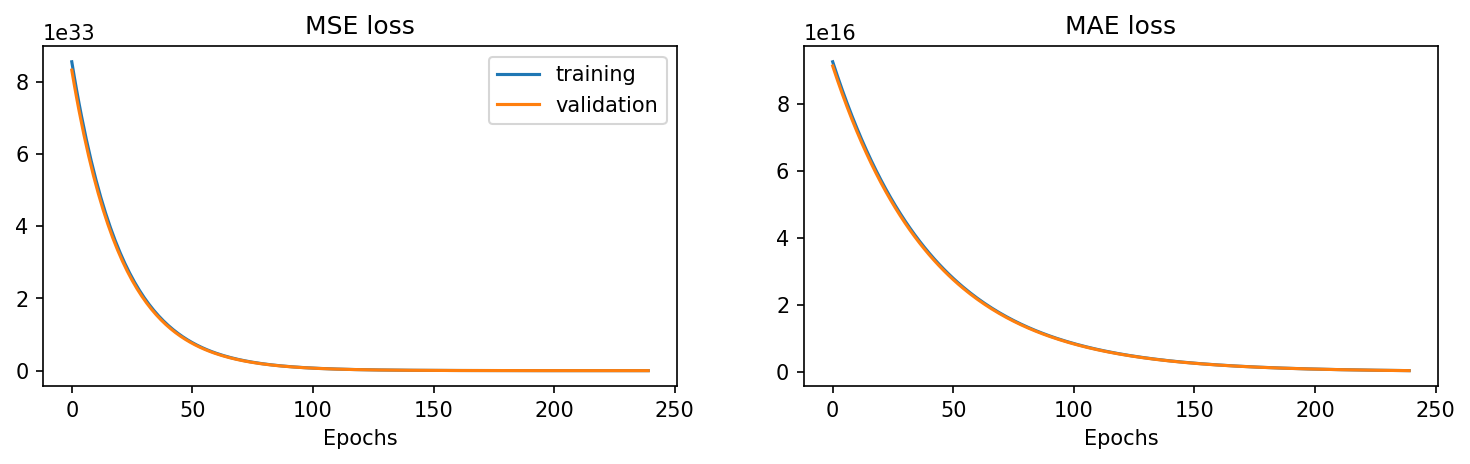

In [20]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, figsize=(12, 3), dpi=150)
ax[0].set_title('MSE loss')
ax[1].set_title('MAE loss')
ax[0].plot(history.history['loss'][10:], label='training')
ax[0].plot(history.history['val_loss'][10:], label='validation')
ax[1].plot(history.history['mae'][10:])
ax[1].plot(history.history['val_mae'][10:])
ax[0].legend()
ax[0].set_xlabel('Epochs')
ax[1].set_xlabel('Epochs')
plt.show()

### Second try

Adding momentum to SGD. Read up more about momentum [here](https://distill.pub/2017/momentum/).

In [21]:
model = tf.keras.Sequential([
        tf.keras.layers.Dense(64, activation='relu', input_shape=(x_train.shape[1],)),
        tf.keras.layers.Dense(1, activation='linear'),
    ])
model.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.0001, momentum=0.95),
    loss='mse',
    metrics=['mae', 'mse']
)
early_stopping_callback = tf.keras.callbacks.EarlyStopping(monitor='mse', patience=20)
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir="./logs")
history = model.fit(
    x_train, y_train,
    batch_size=32,
    epochs=250,
    validation_split=0.1,
    callbacks=[early_stopping_callback, tensorboard_callback],
)

Epoch 1/250
12/12 [==============================] - 1s 17ms/step - loss: 14007086874624.0000 - mae: 1220153.6250 - mse: 14007086874624.0000 - val_loss: 249550752.0000 - val_mae: 15797.1709 - val_mse: 249550752.0000
Epoch 2/250
12/12 [==============================] - 0s 8ms/step - loss: 486631744.0000 - mae: 21782.9746 - mse: 486631744.0000 - val_loss: 786667392.0000 - val_mae: 28047.5898 - val_mse: 786667392.0000
Epoch 3/250
12/12 [==============================] - 0s 8ms/step - loss: 965844416.0000 - mae: 31030.4941 - mse: 965844416.0000 - val_loss: 1159400704.0000 - val_mae: 34049.9727 - val_mse: 1159400704.0000
Epoch 4/250
12/12 [==============================] - 0s 8ms/step - loss: 1249762432.0000 - mae: 35344.5312 - mse: 1249762432.0000 - val_loss: 1335468288.0000 - val_mae: 36544.0586 - val_mse: 1335468288.0000
Epoch 5/250
12/12 [==============================] - 0s 9ms/step - loss: 1361476224.0000 - mae: 36897.7578 - mse: 1361476224.0000 - val_loss: 1375482752.0000 - val_mae: 

In [22]:
y_train_pred_keras = model.predict(x_train)
y_test_pred_keras = model.predict(x_test)

In [23]:
mre_train_keras = (np.abs(y_train - y_train_pred_keras) / y_train).mean()
print('Mean relative train error: {:.2%}'.format(mre_train_keras))

Mean relative train error: 35.67%


In [24]:
mre_test_keras = (np.abs(y_test - y_test_pred_keras) / y_test).mean()
print('Mean relative test error: {:.2%}'.format(mre_test_keras))

Mean relative test error: 35.90%


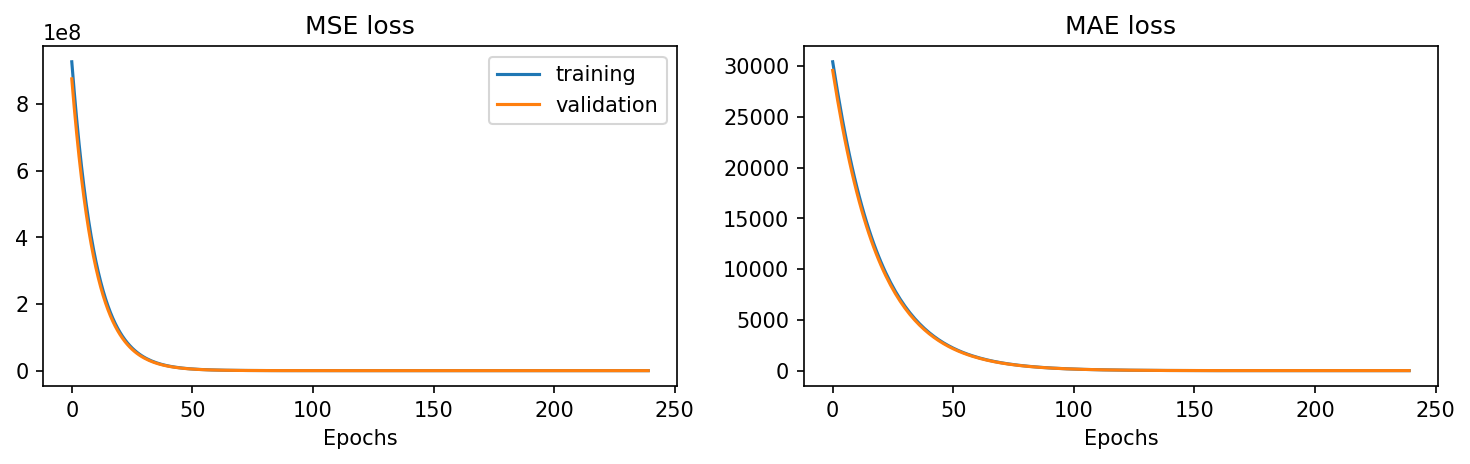

In [25]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, figsize=(12, 3), dpi=150)
ax[0].set_title('MSE loss')
ax[1].set_title('MAE loss')
ax[0].plot(history.history['loss'][10:], label='training')
ax[0].plot(history.history['val_loss'][10:], label='validation')
ax[1].plot(history.history['mae'][10:])
ax[1].plot(history.history['val_mae'][10:])
ax[0].legend()
ax[0].set_xlabel('Epochs')
ax[1].set_xlabel('Epochs')
plt.show()

### Training a bigger network

In [26]:
model = tf.keras.Sequential([
        tf.keras.layers.Dense(128, activation='relu', input_shape=(13,)),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(1, activation='linear'),
    ])
model.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.000001, momentum=0.9),
    loss='mse',
    metrics=['mae']
)
early_stopping_callback = tf.keras.callbacks.EarlyStopping(monitor='mae', patience=20)
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir="./logs")
history = model.fit(
    x_train, y_train,
    epochs=250,
    validation_split=0.1,
    callbacks=[early_stopping_callback, tensorboard_callback],
)

Epoch 1/250
12/12 [==============================] - 1s 41ms/step - loss: 433.8761 - mae: 16.8966 - val_loss: 378.6029 - val_mae: 15.3351
Epoch 2/250
12/12 [==============================] - 0s 8ms/step - loss: 115.2471 - mae: 8.3663 - val_loss: 148.5305 - val_mae: 9.0142
Epoch 3/250
12/12 [==============================] - 0s 7ms/step - loss: 91.3225 - mae: 6.8771 - val_loss: 137.0501 - val_mae: 9.8814
Epoch 4/250
12/12 [==============================] - 0s 7ms/step - loss: 83.3123 - mae: 6.6150 - val_loss: 142.8785 - val_mae: 9.5654
Epoch 5/250
12/12 [==============================] - 0s 8ms/step - loss: 71.5646 - mae: 6.2591 - val_loss: 147.3145 - val_mae: 8.1075
Epoch 6/250
12/12 [==============================] - 0s 9ms/step - loss: 77.4000 - mae: 6.7037 - val_loss: 141.2114 - val_mae: 7.9067
Epoch 7/250
12/12 [==============================] - 0s 8ms/step - loss: 83.2937 - mae: 6.6506 - val_loss: 132.9850 - val_mae: 9.4041
Epoch 8/250
12/12 [==============================] - 0s 8

In [27]:
y_train_pred_keras = model.predict(x_train)
y_test_pred_keras = model.predict(x_test)

In [28]:
mre_train_keras = (np.abs(y_train - y_train_pred_keras) / y_train).mean()
print('Mean relative train error: {:.2%}'.format(mre_train_keras))

Mean relative train error: 19.39%


In [29]:
mre_test_keras = (np.abs(y_test - y_test_pred_keras) / y_test).mean()
print('Mean relative test error: {:.2%}'.format(mre_test_keras))

Mean relative test error: 19.04%


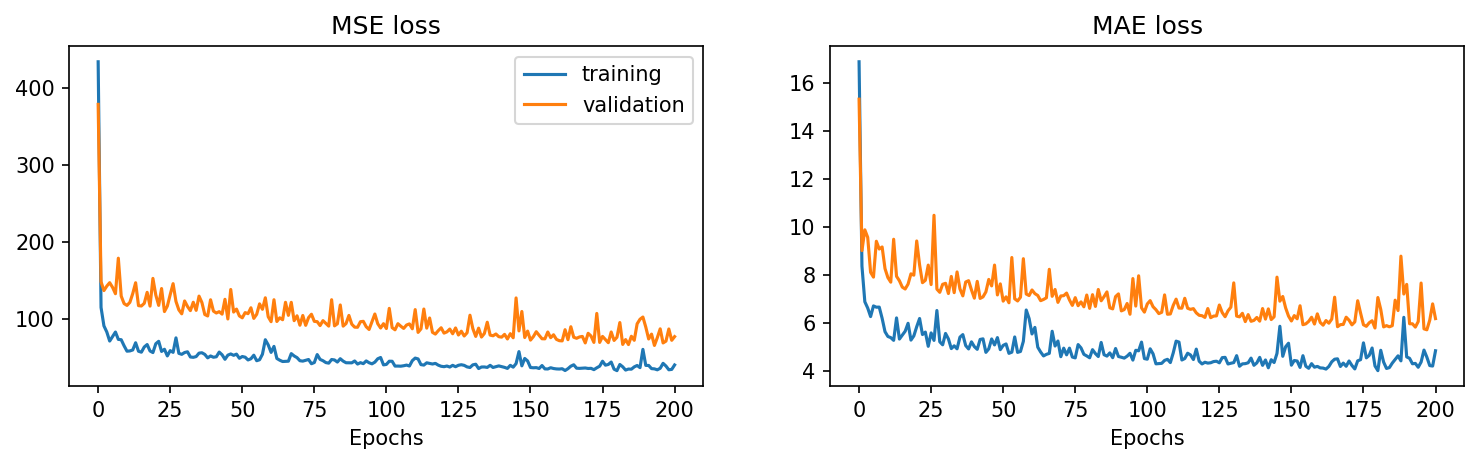

In [30]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, figsize=(12, 3), dpi=150)
ax[0].set_title('MSE loss')
ax[1].set_title('MAE loss')
ax[0].plot(history.history['loss'], label='training')
ax[0].plot(history.history['val_loss'], label='validation')
ax[1].plot(history.history['mae'])
ax[1].plot(history.history['val_mae'])
ax[0].legend()
ax[0].set_xlabel('Epochs')
ax[1].set_xlabel('Epochs')
plt.show()

### Using an advanced optimizer

You can read the original paper on the Adam optimizer [here](https://arxiv.org/abs/1412.6980), or you can also have a look at [lecture 8](https://deeplearning.cs.cmu.edu/S22/document/slides/lec8.optimizersandregularizers.pdf) in this [deep learning course from CMU](https://deeplearning.cs.cmu.edu/S22/index.html).

In [31]:
model = tf.keras.Sequential([
        tf.keras.layers.Dense(128, activation='relu', input_shape=(13,)),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(1, activation='linear'),
    ])
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss='mse',
    metrics=['mae']
)
early_stopping_callback = tf.keras.callbacks.EarlyStopping(monitor='mae', patience=20)
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir="./logs")
history = model.fit(
    x_train, y_train,
    epochs=250,
    validation_split=0.1,
    callbacks=[early_stopping_callback, tensorboard_callback],
)

Epoch 1/250
12/12 [==============================] - 1s 20ms/step - loss: 358.4041 - mae: 14.8606 - val_loss: 184.9943 - val_mae: 9.5518
Epoch 2/250
12/12 [==============================] - 0s 9ms/step - loss: 104.6471 - mae: 7.9742 - val_loss: 165.6547 - val_mae: 8.6357
Epoch 3/250
12/12 [==============================] - 0s 8ms/step - loss: 75.7094 - mae: 6.2868 - val_loss: 126.8671 - val_mae: 7.7150
Epoch 4/250
12/12 [==============================] - 0s 8ms/step - loss: 62.6811 - mae: 5.5094 - val_loss: 117.6240 - val_mae: 7.6207
Epoch 5/250
12/12 [==============================] - 0s 8ms/step - loss: 72.9910 - mae: 6.2721 - val_loss: 119.9534 - val_mae: 7.3496
Epoch 6/250
12/12 [==============================] - 0s 8ms/step - loss: 59.3859 - mae: 5.6652 - val_loss: 116.7376 - val_mae: 7.4659
Epoch 7/250
12/12 [==============================] - 0s 8ms/step - loss: 56.6812 - mae: 5.3246 - val_loss: 117.3378 - val_mae: 7.6337
Epoch 8/250
12/12 [==============================] - 0s 8m

In [32]:
y_train_pred_keras = model.predict(x_train)
y_test_pred_keras = model.predict(x_test)

In [33]:
mre_train_keras = (np.abs(y_train - y_train_pred_keras) / y_train).mean()
print('Mean relative train error: {:.2%}'.format(mre_train_keras))

Mean relative train error: 15.53%


In [34]:
mre_test_keras = (np.abs(y_test - y_test_pred_keras) / y_test).mean()
print('Mean relative test error: {:.2%}'.format(mre_test_keras))

Mean relative test error: 17.40%


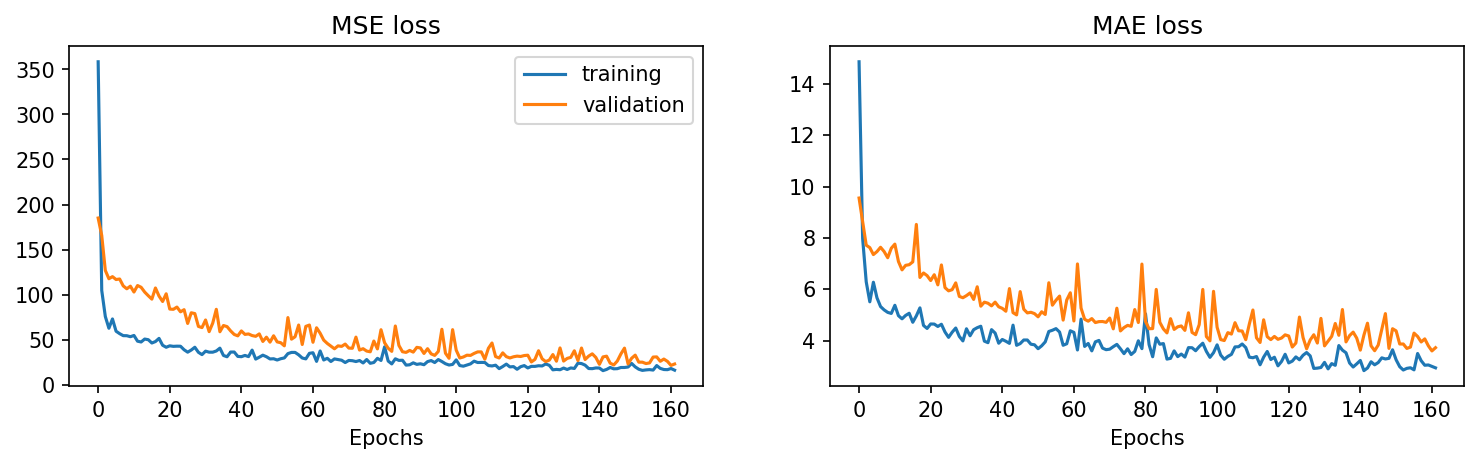

In [35]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, figsize=(12, 3), dpi=150)
ax[0].set_title('MSE loss')
ax[1].set_title('MAE loss')
ax[0].plot(history.history['loss'], label='training')
ax[0].plot(history.history['val_loss'], label='validation')
ax[1].plot(history.history['mae'])
ax[1].plot(history.history['val_mae'])
ax[0].legend()
ax[0].set_xlabel('Epochs')
ax[1].set_xlabel('Epochs')
plt.show()